In [28]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

DATA_PATH = "/dust3r/masked_dust3r/data/jackal_drive"

with open(os.path.join(DATA_PATH, "transforms.json"), "r") as f:
    transforms = json.load(f)

[[ 10.50609322   7.01936599  16.61819463]
 [ 10.51919345   7.03685825   8.34430476]
 [ 10.52159139   7.04293801   1.53429024]
 [ 10.53078379   7.03239259  -7.09998536]
 [ 10.53422156   7.01791263 -15.72003927]
 [ 10.50193358   7.02948547 -20.42501418]
 [ 10.5052996    7.01972608 -23.32788105]
 [ 10.52537011   7.02779788 -27.75016424]
 [ 10.53283056   7.01679071 -28.57196329]
 [ 10.52160401   7.04222113 -32.70597778]
 [ 10.50685896   7.04315263 -37.2885942 ]
 [ 10.5290136    7.02200017 -42.07170228]
 [ 10.52606785   7.03702812 -45.19230901]
 [ 10.5273229    7.0431586  -51.26039472]
 [ 10.52343927   7.03710099 -37.12659928]
 [ 10.50195776   7.0168736  102.95976729]
 [ 10.53344878   7.03565604  97.19288816]
 [ 10.52824361   7.0170423   86.50744088]
 [ 10.50340863   7.04275209  79.71932229]
 [ 10.511522     7.02529437  73.79757305]
 [ 10.50203307   7.04294502  68.59606695]
 [ 10.51858894   7.017475    60.3015803 ]
 [ 10.50265254   7.02573624  57.8161901 ]
 [ 10.53035813   7.0372042   50.41

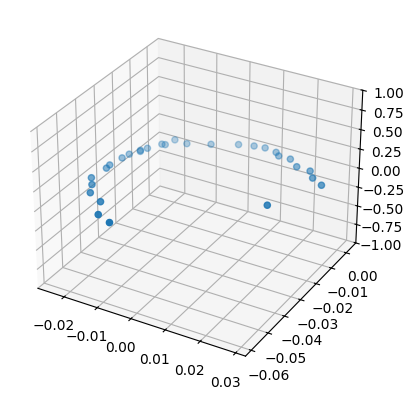

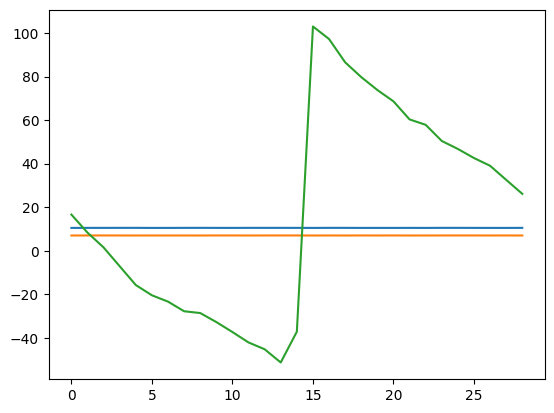

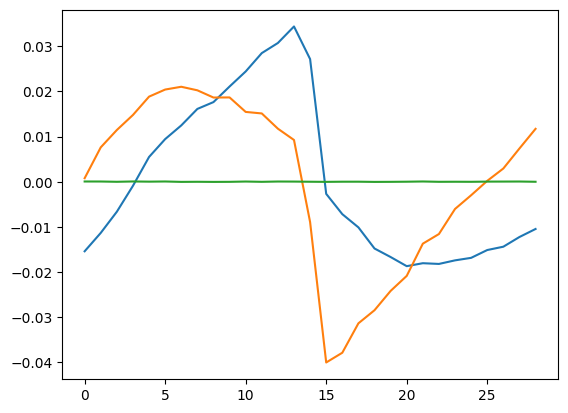

In [29]:
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in transforms["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
#Set z-axis
ax.set_zlim(-1, 1)

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()

[[ 4.49771869e+01  0.00000000e+00  7.20099863e+00]
 [ 4.49771869e+01  0.00000000e+00  1.27098159e+01]
 [ 4.49771869e+01  0.00000000e+00  1.62196148e+01]
 [ 4.49771869e+01  1.27222187e-14  2.32814207e+01]
 [ 4.49771869e+01  1.27222187e-14  2.95632093e+01]
 [ 4.49771869e+01  0.00000000e+00  3.62403840e+01]
 [ 4.49771869e+01  1.27222187e-14  4.11964609e+01]
 [ 4.49771869e+01  0.00000000e+00  4.59038136e+01]
 [ 4.49771869e+01  0.00000000e+00  5.09350131e+01]
 [ 4.49771869e+01  0.00000000e+00  5.56281952e+01]
 [ 4.49771869e+01  0.00000000e+00  6.08285758e+01]
 [ 4.49771869e+01  1.27222187e-14  6.73237624e+01]
 [ 4.49771869e+01  0.00000000e+00  7.15962420e+01]
 [ 4.49771869e+01  0.00000000e+00  7.87423162e+01]
 [ 4.49771869e+01  0.00000000e+00  8.58544386e+01]
 [ 4.49771869e+01  1.27222187e-14  9.11327127e+01]
 [ 4.49771869e+01  1.27222187e-14  9.73857202e+01]
 [ 4.49771869e+01  0.00000000e+00  1.02302081e+02]
 [ 4.49771869e+01  1.27222187e-14  1.09471255e+02]
 [ 4.49771869e+01  0.00000000e+

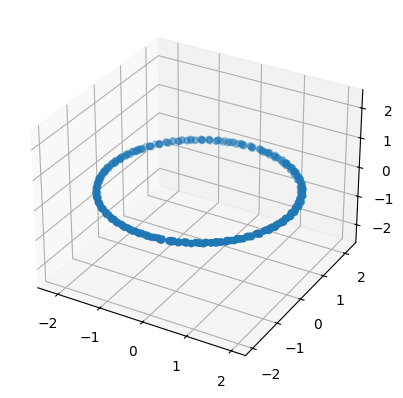

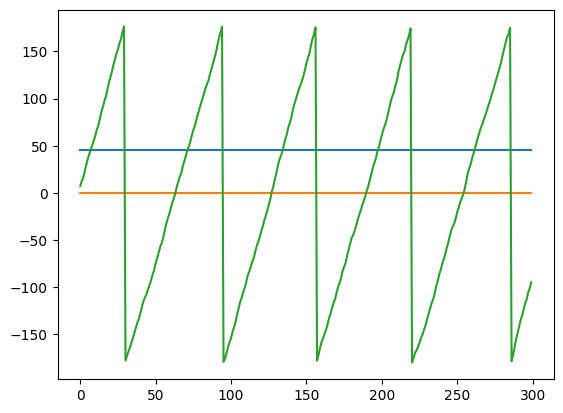

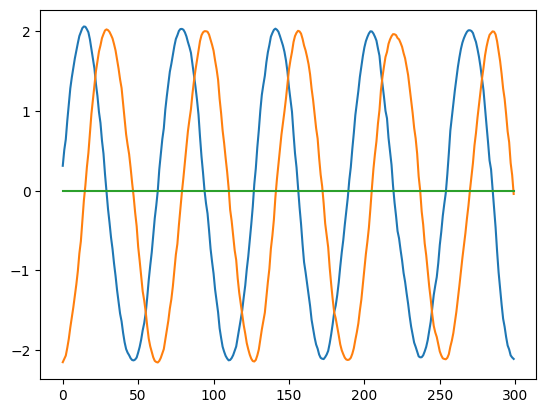

In [30]:
with open(os.path.join(DATA_PATH, "ground_truth.json"), "r") as f:
    ground_truth = json.load(f)
    
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in ground_truth["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()